In [22]:
1

1

In [51]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

In [24]:
DATA_PATH = "../data/GSE69529_metadata.csv"

data = pd.read_csv(DATA_PATH)
data.head()

,lib_id,sample_name,infection_group,"age, months",age_group,who_score,sex,"height, m","weight, kg","wbc, 10^6/L",...,"lymphocytes, 10^6/L","monocytes, 10^6/L","eosinophils, 10^6/L","basophils, 10^6/L","red blood cell, 10^6/uL","platelets, cells/uL",highest_temp,duration_days,days_past_onset,rotavirus vaccine doses
0,lib6081,CO061,HC,11,<2y,Control,female,0.9,12.7,10330,...,3900,480,280,110,3.98,370890,36.5,NaN,NaN,2
1,lib6105,CO062,HC,48,2y+,Control,female,0.91,13.0,10330,...,3900,480,280,110,3.98,370890,36.6,NaN,NaN,0
2,lib6129,CO063,HC,48,2y+,Control,female,0.9,14.9,6500,...,3480,420,310,50,4.14,379000,36.5,NaN,NaN,0
3,lib6153,CO024,HC,15,<2y,Control,male,0.77,11.8,11310,...,5900,580,180,100,3.46,261000,36.6,NaN,NaN,2
4,lib6177,CO013,HC,16,<2y,Control,male,1.2,15.0,5570,...,3800,30,20,80,4.75,370940,35.7,NaN,NaN,2


age_group redundant, HC gak perlu

In [25]:
data.isna().sum() # NAN karena HC

lib_id                      0
sample_name                 0
infection_group             0
age, months                 0
age_group                   0
who_score                   0
sex                         0
height, m                   0
weight, kg                  0
wbc, 10^6/L                 0
neutrophils, 10^6/L         0
lymphocytes, 10^6/L         0
monocytes, 10^6/L           0
eosinophils, 10^6/L         0
basophils, 10^6/L           0
red blood cell, 10^6/uL     0
platelets, cells/uL         0
highest_temp                2
duration_days              31
days_past_onset            29
rotavirus vaccine doses     0
dtype: int64

In [26]:
data.duplicated().sum()

0

In [27]:
kategorikal_columns = data.select_dtypes(include=['object']).columns

for column in kategorikal_columns:
    print(f"{column}: {data[column].nunique()}")
    if data[column].nunique() > 10:
        print(f"{column}: {data[column].unique()[:10]} and more...")
    else:
        print(f"{column}: {data[column].unique()}")
    print("----"*100)

lib_id: 193
lib_id: ['lib6081' 'lib6105' 'lib6129' 'lib6153' 'lib6177' 'lib6201' 'lib6225'
 'lib6249' 'lib6273' 'lib6274'] and more...
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sample_name: 193
sample_name: ['CO061' 'CO062' 'CO063' 'CO024' 'CO013' 'CO026' 'CO030' 'CO046' 'CO032'
 'CO056'] and more...
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
height_unique = list(data["height, m"].unique())
height_unique.sort()

In [29]:
print(height_unique)

['0.51', '0.53', '0.54', '0.55', '0.57', '0.58', '0.59', '0.6', '0.61', '0.62', '0.63', '0.64', '0.65', '0.67', '0.68', '0.7', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.76 CM ', '0.77', '0.78', '0.79', '0.8', '0.81', '0.82', '0.83', '0.84', '0.85', '0.86', '0.87', '0.88', '0.89', '0.9', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '1', '1.02', '1.04', '1.05', '1.06', '1.08', '1.09', '1.1', '1.13', '1.14', '1.15', '1.16', '1.17', '1.19', '1.2', '1.24', '1.25', '1.26', '1.4', '1.45', '1.5', '1.6', '100', '90.5']


anomali: 
 - '0.76', '0.76 CM'
 - '100'
 - '90.5'

In [30]:
data["height, m"] = data["height, m"].replace(
    {
        "0.76 CM ":"0.76",
        '100': '1.0',
        '90.5': '0.905',
     }
)

height_unique = list(data["height, m"].unique())
height_unique.sort()
print(height_unique)

['0.51', '0.53', '0.54', '0.55', '0.57', '0.58', '0.59', '0.6', '0.61', '0.62', '0.63', '0.64', '0.65', '0.67', '0.68', '0.7', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.77', '0.78', '0.79', '0.8', '0.81', '0.82', '0.83', '0.84', '0.85', '0.86', '0.87', '0.88', '0.89', '0.9', '0.905', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '1', '1.0', '1.02', '1.04', '1.05', '1.06', '1.08', '1.09', '1.1', '1.13', '1.14', '1.15', '1.16', '1.17', '1.19', '1.2', '1.24', '1.25', '1.26', '1.4', '1.45', '1.5', '1.6']


In [31]:
data["height, m"] = data["height, m"].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lib_id                   193 non-null    object 
 1   sample_name              193 non-null    object 
 2   infection_group          193 non-null    object 
 3   age, months              193 non-null    int64  
 4   age_group                193 non-null    object 
 5   who_score                193 non-null    object 
 6   sex                      193 non-null    object 
 7   height, m                193 non-null    float64
 8   weight, kg               193 non-null    float64
 9   wbc, 10^6/L              193 non-null    int64  
 10  neutrophils, 10^6/L      193 non-null    int64  
 11  lymphocytes, 10^6/L      193 non-null    int64  
 12  monocytes, 10^6/L        193 non-null    int64  
 13  eosinophils, 10^6/L      193 non-null    int64  
 14  basophils, 10^6/L        1

In [32]:
num_kolom = data.select_dtypes(include=['float64', 'int64']).columns

skew_kurt_df = pd.DataFrame(columns=["skewness", "kurtosis"], index=num_kolom)

skew_kurt_df["skewness"] = data[num_kolom].skew()
skew_kurt_df["kurtosis"] = data[num_kolom].kurtosis()

skew_kurt_df

,skewness,kurtosis
"age, months",1.179905,0.705851
"height, m",0.992900,1.039942
"weight, kg",5.534818,52.423270
"wbc, 10^6/L",5.933994,56.557636
"neutrophils, 10^6/L",2.657657,13.256737
"lymphocytes, 10^6/L",1.407444,2.473272
"monocytes, 10^6/L",2.196380,7.032958
"eosinophils, 10^6/L",2.396714,8.071608
"basophils, 10^6/L",5.705885,49.311064
"red blood cell, 10^6/uL",-1.126700,3.669543


In [75]:
skew_kurt_df

,skewness,kurtosis
"age, months",1.179905,0.705851
"height, m",0.992900,1.039942
"weight, kg",5.534818,52.423270
"wbc, 10^6/L",5.933994,56.557636
"neutrophils, 10^6/L",2.657657,13.256737
"lymphocytes, 10^6/L",1.407444,2.473272
"monocytes, 10^6/L",2.196380,7.032958
"eosinophils, 10^6/L",2.396714,8.071608
"basophils, 10^6/L",5.705885,49.311064
"red blood cell, 10^6/uL",-1.126700,3.669543


weight, kg: Skewed (skewness = 5.53, kurtosis = 52.42) \
wbc, 10^6/L: Skewed (skewness = 5.93, kurtosis = 56.56) \
neutrophils, 10^6/L: Skewed (skewness = 2.66, kurtosis = 13.26) \
monocytes, 10^6/L: Skewed (skewness = 2.20, kurtosis = 7.03) \
eosinophils, 10^6/L: Skewed (skewness = 2.40, kurtosis = 8.07) \
basophils, 10^6/L: Skewed (skewness = 5.71, kurtosis = 49.31) \
duration_days: Skewed (skewness = 2.95, kurtosis = 12.53) 

In [34]:
# columns_to_transform = ['weight, kg', 'wbc, 10^6/L', 'neutrophils, 10^6/L', 'monocytes, 10^6/L', 
#                         'eosinophils, 10^6/L', 'basophils, 10^6/L', 'duration_days']

# data[columns_to_transform] = data[columns_to_transform].replace(0, 1e-10)
# data[columns_to_transform] = np.log(data[columns_to_transform])

# # check skewness and kurtosis
# skew_kurt_df = pd.DataFrame(columns=["skewness", "kurtosis"], index=columns_to_transform)

# skew_kurt_df["skewness"] = data[num_kolom].skew()
# skew_kurt_df["kurtosis"] = data[num_kolom].kurtosis()
# skew_kurt_df["skewness"] = data[num_kolom].skew()
# skew_kurt_df["kurtosis"] = data[num_kolom].kurtosis()
# skew_kurt_df

In [56]:
def z_outlier(data):
    z = np.abs((data - data.mean()) / data.std())
    return z

## Analisis Statistik Deskriptif

In [37]:
data["infection_group"].unique()

array(['HC', 'Ecoli', 'Salmonella', 'Shigella', 'Rotavirus'], dtype=object)

In [52]:
# 0 untuk virus dan 1 untuk bakteri
dict_infection_group = {
    "Ecoli": 1,
    "Salmonella": 1,
    "Shigella": 1,
    "Rotavirus": 0,
}

data_biner = data[data["infection_group"] != "HC"].copy()
data_biner.loc[:, "infection_group"] = data_biner["infection_group"].replace(dict_infection_group)

data_biner["infection_group"].value_counts()

infection_group
1    112
0     52
Name: count, dtype: int64

In [53]:
# see the null data in the dataset
data_biner["duration_days"].fillna(data_biner["duration_days"].mean(), inplace=True)
data_biner["highest_temp"].fillna(data_biner["highest_temp"].mean(), inplace=True)

data_biner.isna().sum()

lib_id                     0
sample_name                0
infection_group            0
age, months                0
age_group                  0
who_score                  0
sex                        0
height, m                  0
weight, kg                 0
wbc, 10^6/L                0
neutrophils, 10^6/L        0
lymphocytes, 10^6/L        0
monocytes, 10^6/L          0
eosinophils, 10^6/L        0
basophils, 10^6/L          0
red blood cell, 10^6/uL    0
platelets, cells/uL        0
highest_temp               0
duration_days              0
days_past_onset            0
rotavirus vaccine doses    0
dtype: int64

In [72]:
data_biner[num_kolom].describe().T[["mean", "std", "min", "max", "50%"]]

,mean,std,min,max,50%
"age, months",27.756098,24.004632,1.00,108.00,22.50
"height, m",0.852226,0.217254,0.51,1.60,0.80
"weight, kg",12.360854,8.173696,2.90,90.00,10.95
"wbc, 10^6/L",11835.548780,5442.884842,3860.00,35150.00,10450.00
"neutrophils, 10^6/L",6757.682927,4600.482583,400.00,21800.00,5600.00
"lymphocytes, 10^6/L",3754.573171,2878.478712,300.00,14600.00,2900.00
"monocytes, 10^6/L",1092.682927,762.614246,60.00,4900.00,900.00
"eosinophils, 10^6/L",92.804878,145.751906,0.00,800.00,10.00
"basophils, 10^6/L",78.902439,155.038140,0.00,1500.00,15.00
"red blood cell, 10^6/uL",4.105732,0.578953,1.19,5.25,4.16


In [69]:
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency

sample_0 = data_biner[data_biner['infection_group'] == 0]
sample_1 = data_biner[data_biner['infection_group'] == 1]
significant_columns = []
significant_columns_p = []
not_significant_columns = []
not_significant_columns_p = []

columns = list(data_biner.columns)
columns.remove("infection_group")

for column in columns:
    if data_biner[column].dtype == 'int64' or data_biner[column].dtype == 'float64':  # Numerical data
        stat, p = mannwhitneyu(sample_0[column], sample_1[column])
    else:  # Categorical data
        contingency_table = pd.crosstab(data_biner[column], data_biner['infection_group'])
        stat, p, _, _ = chi2_contingency(contingency_table)
    
    # Check significance level (e.g., 0.05)
    if p < 0.05:
        significant_columns.append(column)
        significant_columns_p.append(p)
    else:
        not_significant_columns.append(column)
        not_significant_columns_p.append(p)

significant_columns_df = pd.DataFrame({
    'column': significant_columns,
    'p-value': significant_columns_p
})

not_significant_columns_df = pd.DataFrame({
    'column': not_significant_columns,
    'p-value': not_significant_columns_p
})

print(significant_columns_df)

                column       p-value
0          age, months  1.662062e-02
1            who_score  8.386505e-03
2           weight, kg  1.303768e-02
3          wbc, 10^6/L  1.222661e-03
4  lymphocytes, 10^6/L  3.063004e-05
5    monocytes, 10^6/L  3.686495e-02
6  eosinophils, 10^6/L  1.147666e-07
7    basophils, 10^6/L  2.551784e-04


In [76]:
significant_columns_df.to_clipboard()

In [70]:
print(not_significant_columns_df)

                     column   p-value
0                    lib_id  0.463275
1               sample_name  0.463275
2                 age_group  0.205441
3                       sex  0.610688
4                 height, m  0.086131
5       neutrophils, 10^6/L  0.483000
6   red blood cell, 10^6/uL  0.162205
7       platelets, cells/uL  0.536297
8              highest_temp  0.918071
9             duration_days  0.323987
10          days_past_onset  0.361656
11  rotavirus vaccine doses  0.195406


## EDA

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
num_kolom_and_target = num_kolom.tolist()

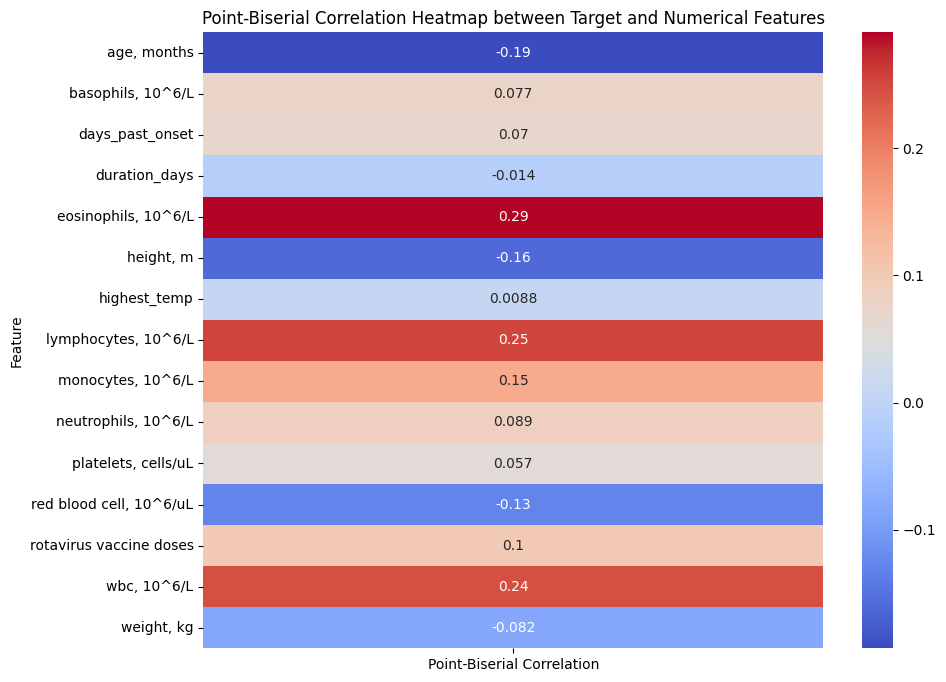

In [92]:
from scipy.stats import pointbiserialr

correlation_data = {}
for column in num_kolom_and_target:
        point_biserial_corr, _ = pointbiserialr(data_biner[column], data_biner['infection_group'])
        correlation_data[column] = point_biserial_corr

# Convert correlation data to DataFrame
correlation_df = pd.DataFrame(list(correlation_data.items()), columns=['Feature', 'Point-Biserial Correlation'])

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_df.pivot_table(index='Feature', columns=None, values='Point-Biserial Correlation'), annot=True, cmap='coolwarm')
plt.title('Point-Biserial Correlation Heatmap between Target and Numerical Features')
plt.show()

In [93]:
data_biner.columns

Index(['lib_id', 'sample_name', 'infection_group', 'age, months', 'age_group',
       'who_score', 'sex', 'height, m', 'weight, kg', 'wbc, 10^6/L',
       'neutrophils, 10^6/L', 'lymphocytes, 10^6/L', 'monocytes, 10^6/L',
       'eosinophils, 10^6/L', 'basophils, 10^6/L', 'red blood cell, 10^6/uL',
       'platelets, cells/uL', 'highest_temp', 'duration_days',
       'days_past_onset', 'rotavirus vaccine doses'],
      dtype='object')

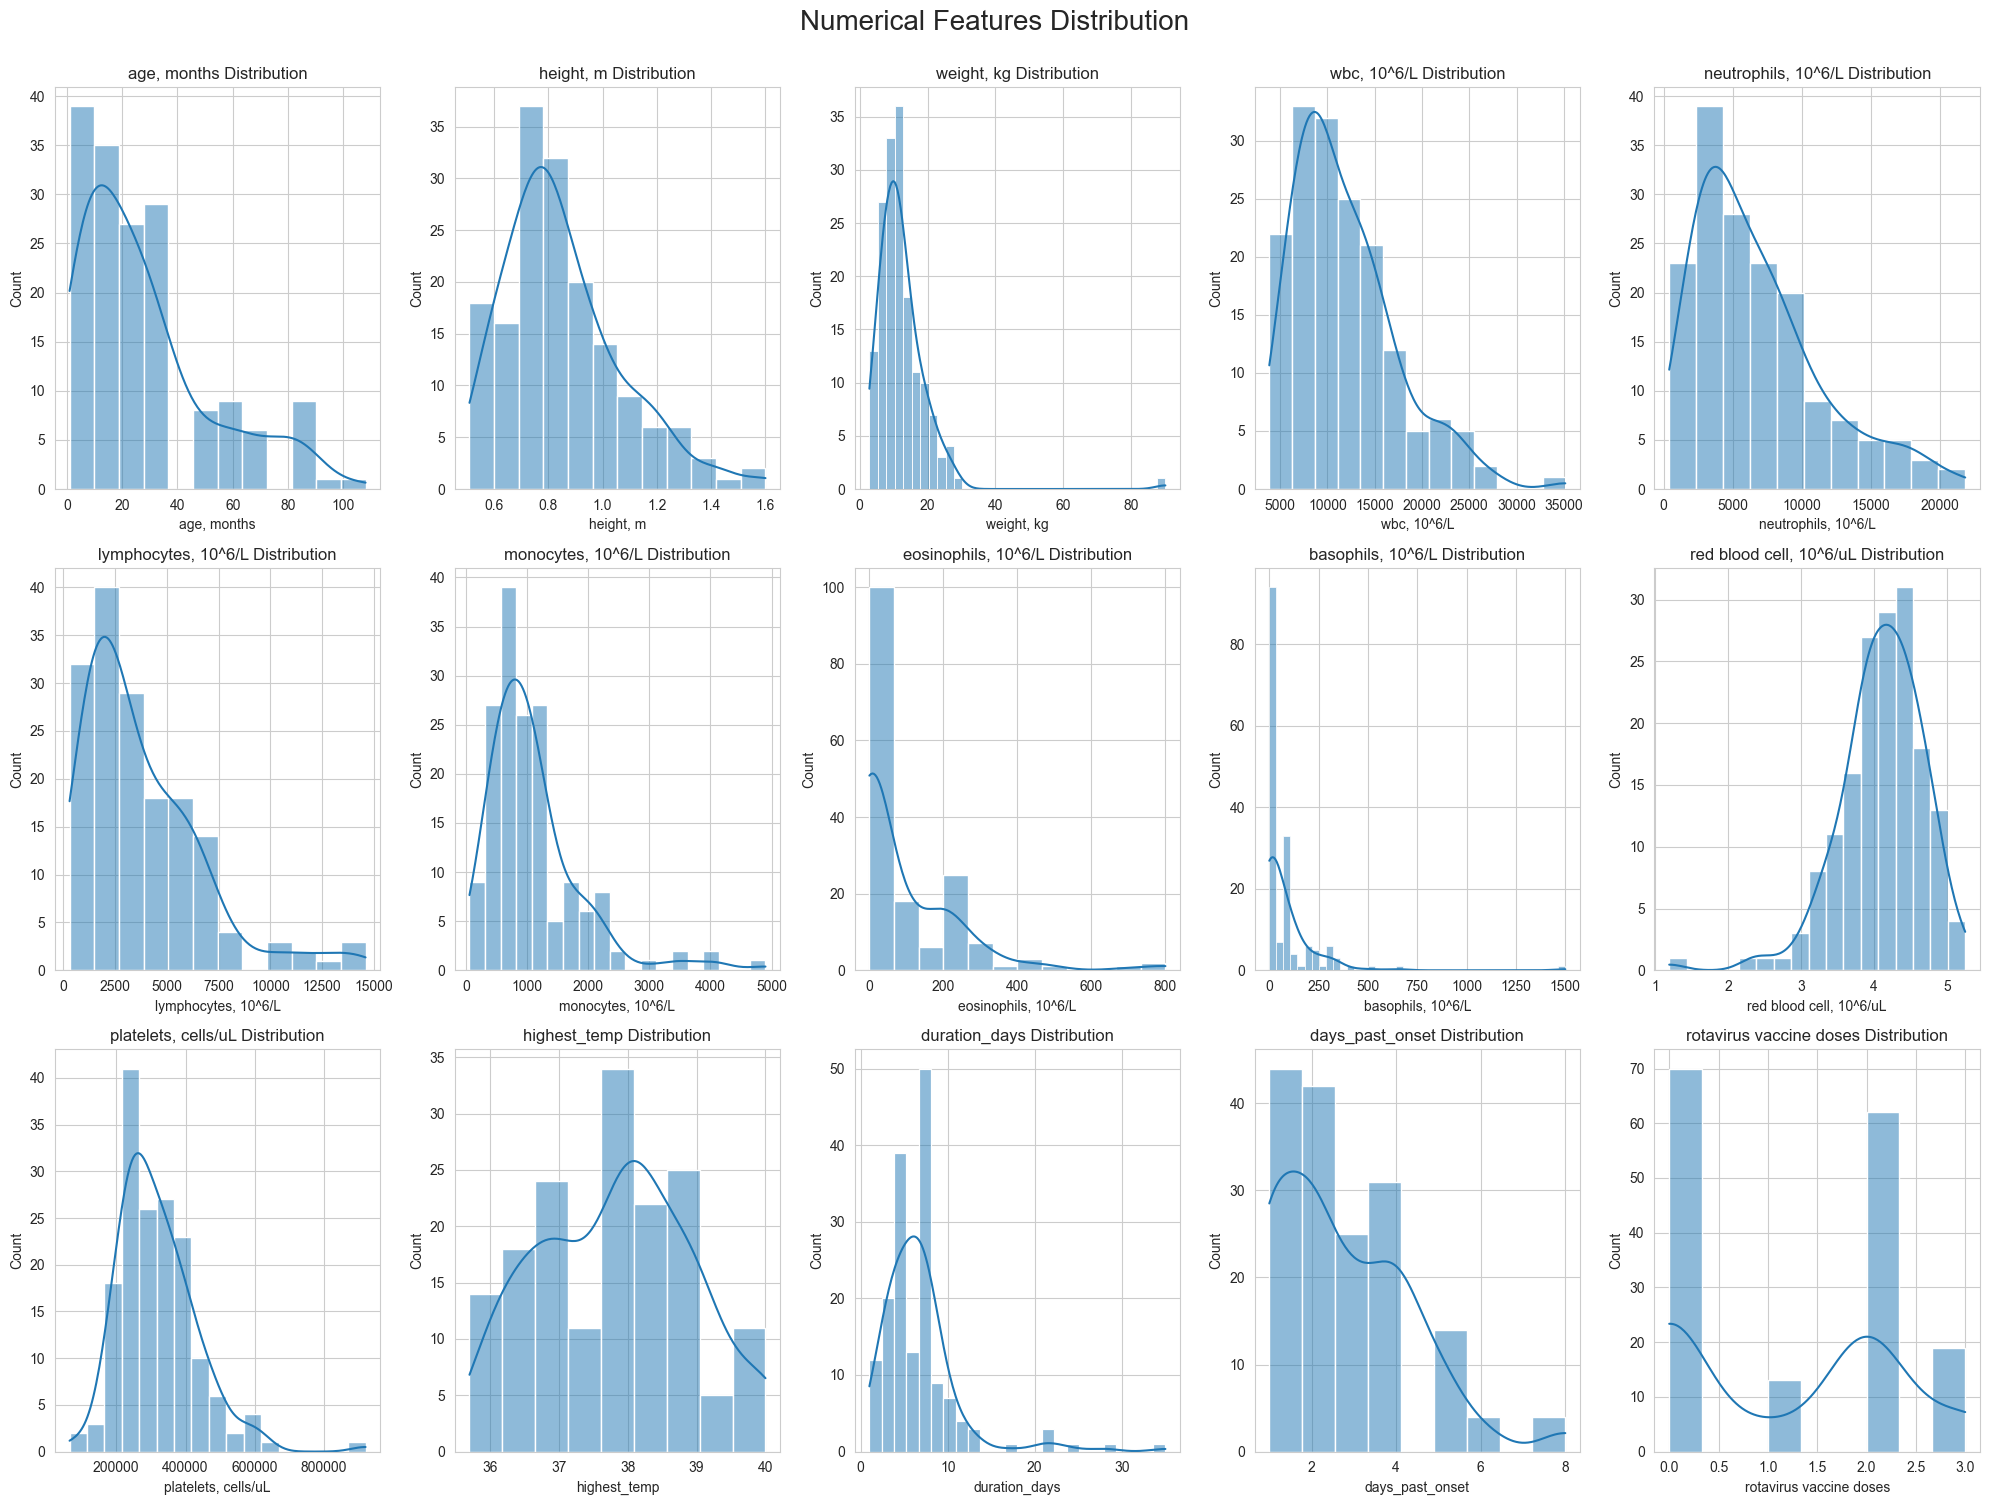

In [134]:
# univariate visualization for numerical data

n = len(num_kolom)
n_row = 3
n_col = n // n_row

fig, axes = plt.subplots(n_row, n_col, figsize=(20, 15))
plt.suptitle('Numerical Features Distribution', fontsize=20, y=1.0)
axes = axes.ravel()

for i, column in enumerate(num_kolom):
    sns.histplot(data_biner[column], ax=axes[i], kde=True)
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel(column)
    plt.tight_layout()

plt.show()

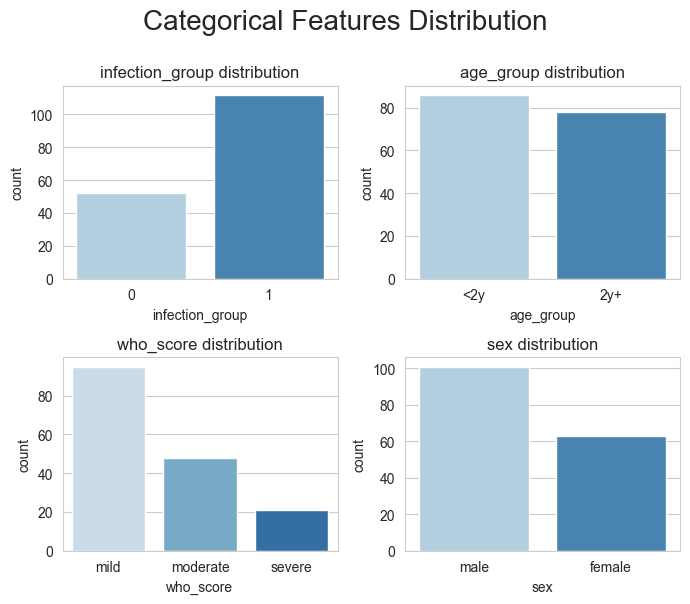

In [131]:
# univariate visualization for categorical data

cat_kolom = data_biner.select_dtypes(include=['object']).columns

# cat_kolom with unique value less than 20
cat_kolom = [column for column in cat_kolom if data_biner[column].nunique() < 10]

n_c = len(cat_kolom)
n_row_c = 2
n_col_c = n_c // n_row_c

fig, axes = plt.subplots(n_row_c, n_col_c, figsize=(7, 6))
plt.suptitle('Categorical Features Distribution', fontsize=20, y=1.0)

axes = axes.ravel()

for i, column in enumerate(cat_kolom):
    sns.barplot(x=data_biner[column].value_counts().index, y=data_biner[column].value_counts(), ax=axes[i], palette='Blues')
    axes[i].set_title(f"{column} distribution")
    axes[i].set_xlabel(column)
    plt.tight_layout()

plt.show()

In [124]:
data.columns

Index(['lib_id', 'sample_name', 'infection_group', 'age, months', 'age_group',
       'who_score', 'sex', 'height, m', 'weight, kg', 'wbc, 10^6/L',
       'neutrophils, 10^6/L', 'lymphocytes, 10^6/L', 'monocytes, 10^6/L',
       'eosinophils, 10^6/L', 'basophils, 10^6/L', 'red blood cell, 10^6/uL',
       'platelets, cells/uL', 'highest_temp', 'duration_days',
       'days_past_onset', 'rotavirus vaccine doses'],
      dtype='object')

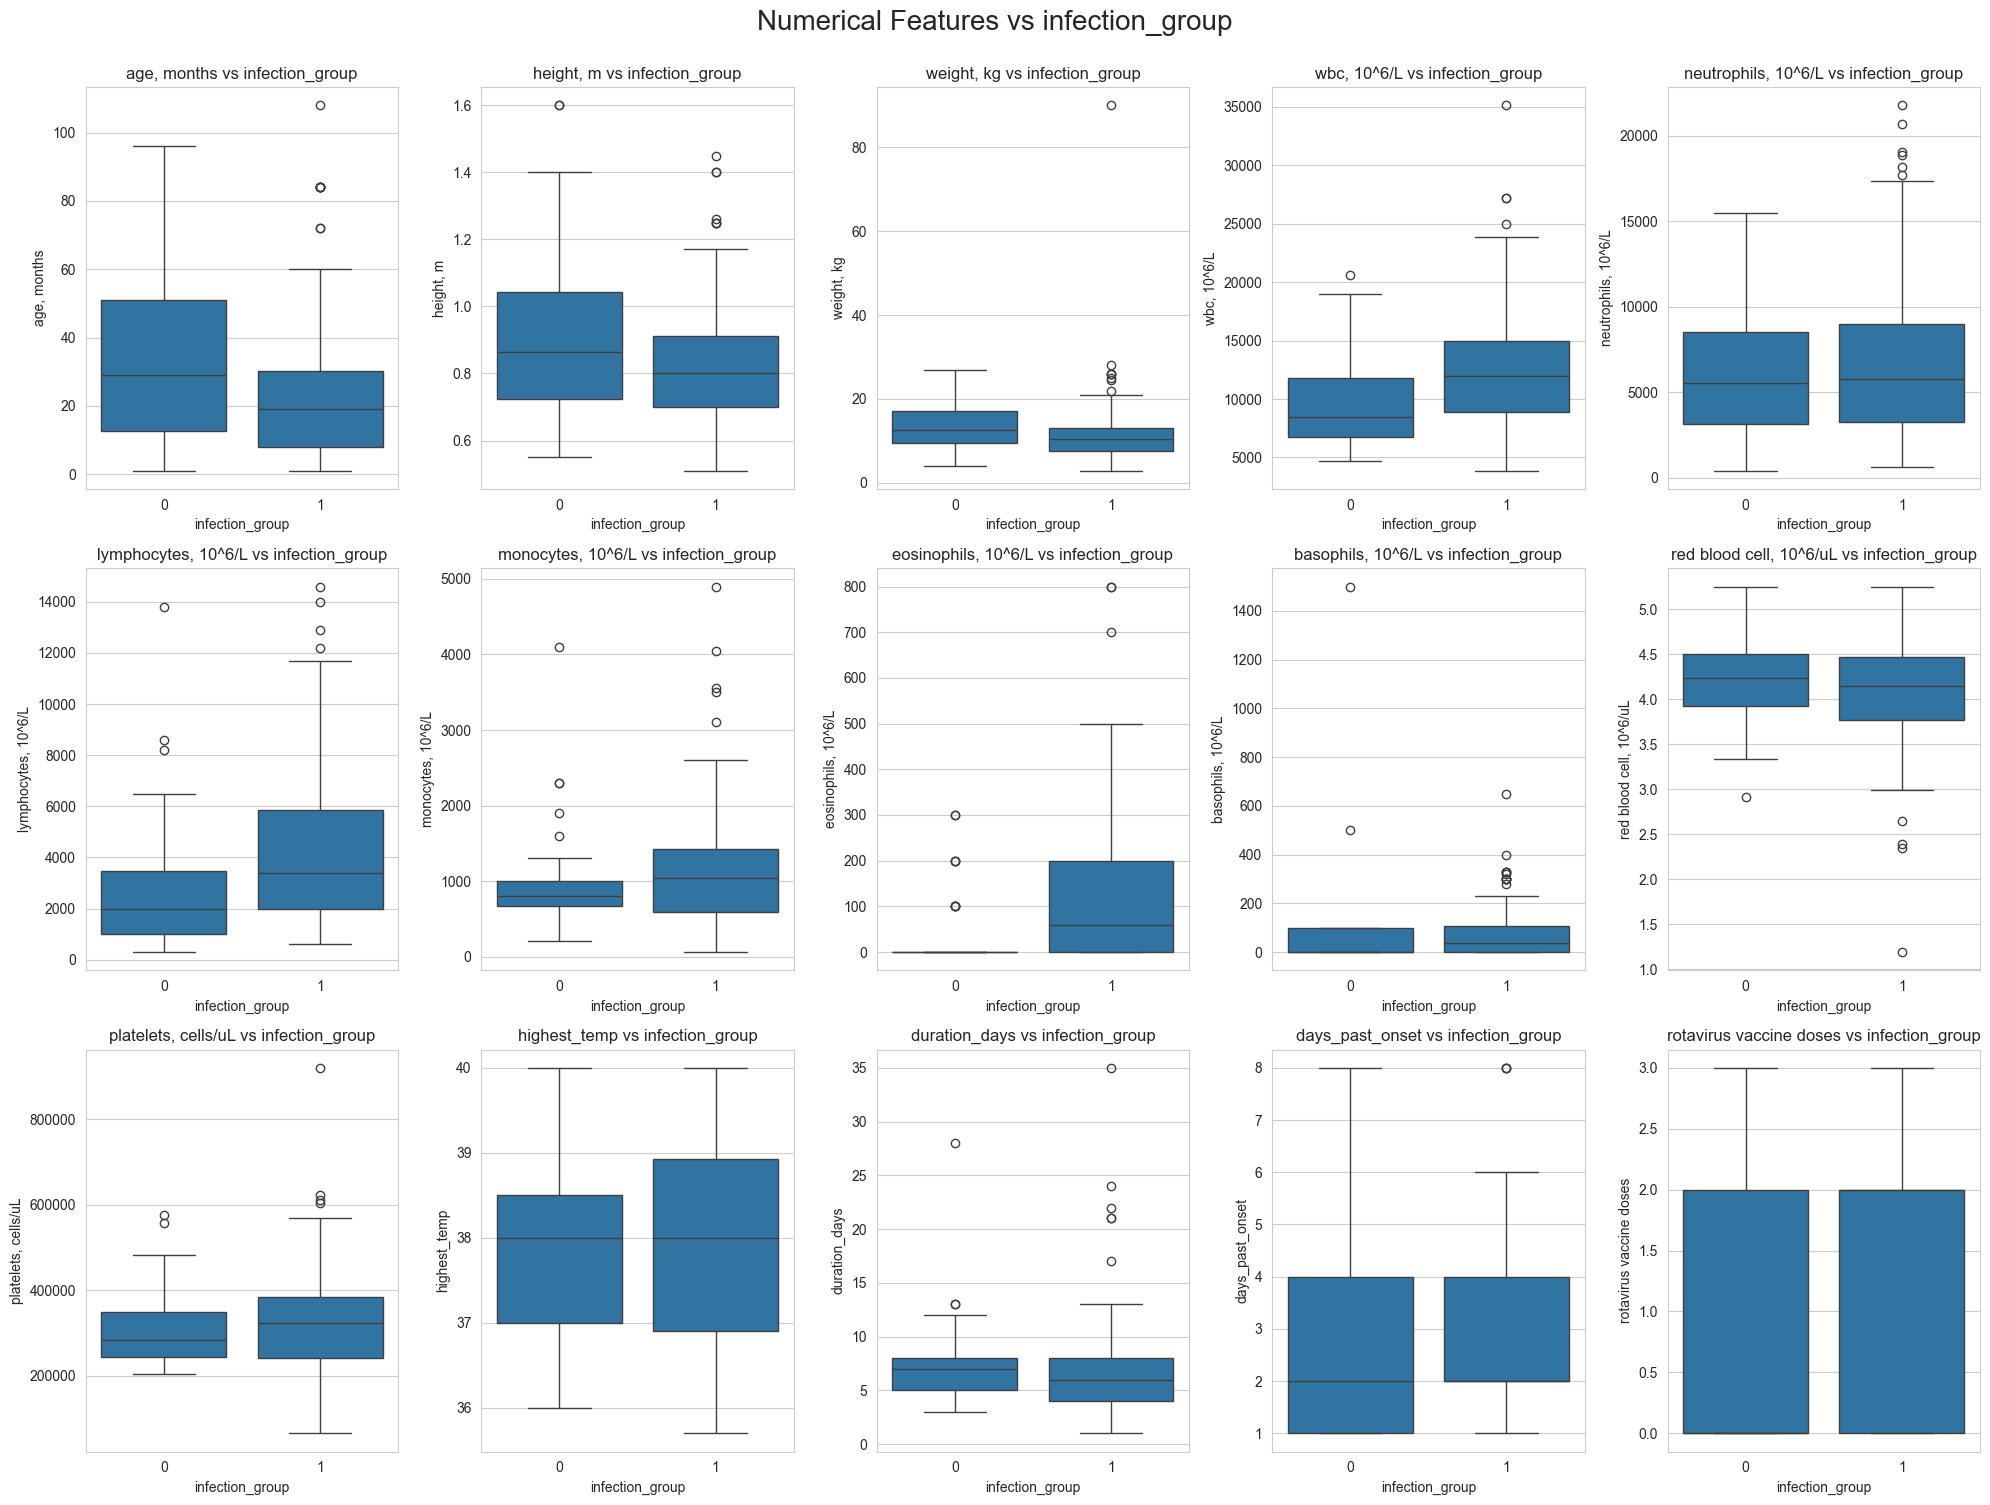

In [130]:
# all numerical vs target

n = len(num_kolom)
n_row = 3
n_col = n // n_row

fig, axes = plt.subplots(n_row, n_col, figsize=(20, 15))
plt.suptitle('Numerical Features vs infection_group', fontsize=20, y=1.0)
axes = axes.ravel()

for i, column in enumerate(num_kolom):
    sns.boxplot(x='infection_group', y=column, data=data_biner, ax=axes[i])
    axes[i].set_title(f"{column} vs infection_group")
    axes[i].set_xlabel("infection_group")
    axes[i].set_ylabel(column)
    plt.tight_layout()

plt.show()

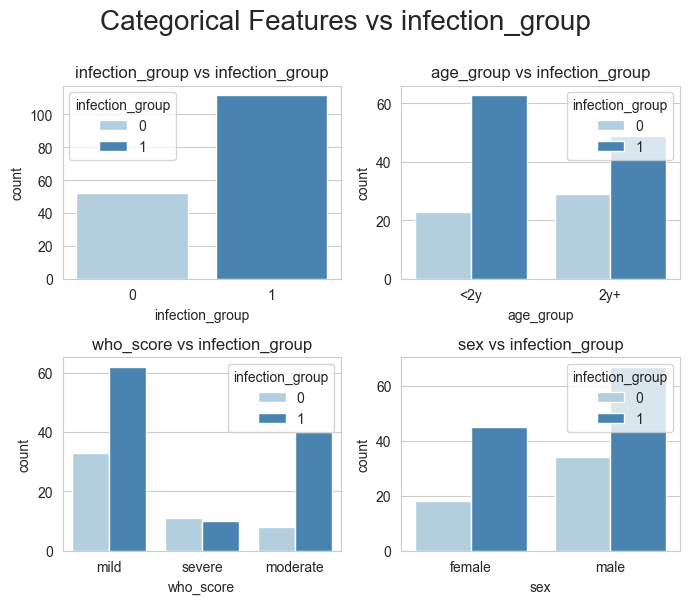

In [135]:
# all categorical vs target

cat_kolom = data_biner.select_dtypes(include=['object']).columns

# cat_kolom with unique value less than 20
cat_kolom = [column for column in cat_kolom if data_biner[column].nunique() < 10]

n_c = len(cat_kolom)
n_row_c = 2
n_col_c = n_c // n_row_c

fig, axes = plt.subplots(n_row_c, n_col_c, figsize=(7, 6))
plt.suptitle('Categorical Features vs infection_group', fontsize=20, y=1.0)

axes = axes.ravel()

for i, column in enumerate(cat_kolom):
    sns.countplot(x=column, hue='infection_group', data=data_biner, ax=axes[i], palette='Blues')
    axes[i].set_title(f"{column} vs infection_group")
    axes[i].set_xlabel(column)
    plt.tight_layout()
    
plt.show()

In [137]:
data_biner.columns

Index(['lib_id', 'sample_name', 'infection_group', 'age, months', 'age_group',
       'who_score', 'sex', 'height, m', 'weight, kg', 'wbc, 10^6/L',
       'neutrophils, 10^6/L', 'lymphocytes, 10^6/L', 'monocytes, 10^6/L',
       'eosinophils, 10^6/L', 'basophils, 10^6/L', 'red blood cell, 10^6/uL',
       'platelets, cells/uL', 'highest_temp', 'duration_days',
       'days_past_onset', 'rotavirus vaccine doses'],
      dtype='object')

In [138]:
data_biner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 29 to 192
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lib_id                   164 non-null    object 
 1   sample_name              164 non-null    object 
 2   infection_group          164 non-null    object 
 3   age, months              164 non-null    int64  
 4   age_group                164 non-null    object 
 5   who_score                164 non-null    object 
 6   sex                      164 non-null    object 
 7   height, m                164 non-null    float64
 8   weight, kg               164 non-null    float64
 9   wbc, 10^6/L              164 non-null    int64  
 10  neutrophils, 10^6/L      164 non-null    int64  
 11  lymphocytes, 10^6/L      164 non-null    int64  
 12  monocytes, 10^6/L        164 non-null    int64  
 13  eosinophils, 10^6/L      164 non-null    int64  
 14  basophils, 10^6/L        164 n